In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
np.random.seed = 42

# Cramer-Rao Lower Bound

This is a really long chapter, I might only read parts and return to it later.
CRLB is a lower bound on the variance of any unbiased estimator.  
Our ability to estimate a parameter depends directly on the PDF, on how much the PDF is influenced by the unknown parameter.

Here's a confusing plot:

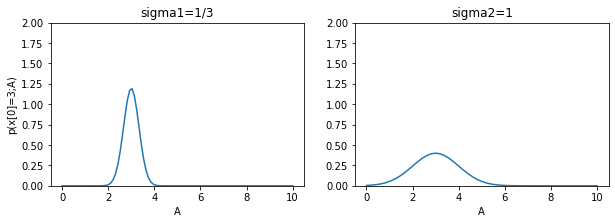

In [44]:
x_0 = 3.
sigma1 = 1./3
sigma2 = 1.
A = np.linspace(0, 10, 100)
fig = plt.figure(figsize=(10,3))

ax1 = plt.subplot(121)
ax1.set_title("sigma1=1/3")
ax1.set_xlabel("A")
ax1.set_ylabel("p(x[0]=3;A)")
ax1.set_ylim(top=2.)
ax2 = plt.subplot(122, sharey=ax1)
ax2.set_title(b"sigma2=1")
ax2.set_xlabel("A")
ax1.plot(A, [scipy.stats.norm.pdf(x_0, a, sigma1) for a in A])
ax2.plot(A, [scipy.stats.norm.pdf(x_0, a, sigma2) for a in A]);
scipy.stats.norm.

What we see here is the ever confusing likelyhood function, where we fix the data(in this case $x[0]=3$) and look at the pdf as a function of A. This is __NOT__ a probability function, as you can verify the integral doesn't sum to 1. What we can assert is that the left plot is much more indicative of A=3 then the right one. One can make a approximate proposition that the probability of $x[0]$ being in a small interval $\left(3-\frac\delta2, 3+\frac\delta2\right)$ is for $\delta$ small enough equal to $p(x[0]=3;A)\delta$, so
$$\begin{align}
p(x[0]=3;A=3)\delta&=1.20\delta \\
p(x[0]=3;A=4)\delta&=0.01\delta
\end{align}$$

So observing $x[0]=3$ is much more probable in the first case than the latter. So if arguing that therefore values of A are in the interval $3\pm3\sigma_1$ we have $[2,4]$ as our viable interval. In the second figure, the interval would be $[0,6]$, much wider.

_Okay, this whole argument is a little bit half-assed, and mostly copied from the book. I can't claim to stand behind, but don't deny it either. Also, I spent way too long on this, around an hour. Learn to skip!_

We did earn some intuition. And that is, the "sharpness" of the likelihood function determines how accurately we can estimate the unknown parameter. What is "sharpness" mathematically? Curvature!

We often actually use the log-likelihood. Why? makes computation easier, and doesn't change the shape of the function. Not convinced? let's have a look

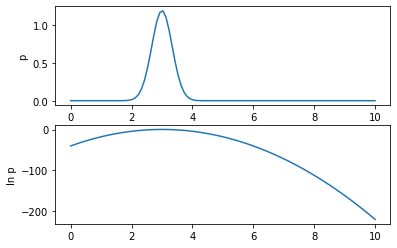

In [48]:
ax1 = plt.subplot(211)
ax1.set_ylabel('p')
ax2 = plt.subplot(212)
ax2.set_ylabel('ln p')
ax1.plot(A, [scipy.stats.norm.pdf(x_0, a, sigma1) for a in A])
ax2.plot(A, np.log([scipy.stats.norm.pdf(x_0, a, sigma1) for a in A]));         

Well, maybe doesn't change the shape is an overstatement, but clearly maxima and minima are kept, and order will be retained when comparing between likelihood functions, so the curvature of one is smaller than the other even after taking the logarithm. _I'm not sure if I believe it myself_.

In our example
$$\ln p(x[0];A)=-\ln\sqrt{2\pi\sigma^2}-\frac1{2\sigma^2}(x[0]-A)^2$$
The first derivative is
$$\frac{\partial\ln p(x[0];A)}{\partial A} 
= \frac1{\sigma^2}(x[0]-A)$$
And the negative of the second
$$-\frac{\partial^2\ln p(x[0];A)}{\partial A^2} = \frac1{\sigma^2}$$
We can now restate the variance of our estimator $\hat{A}=x[0]$ like this
$$\text{var}(\hat A) = \frac1{-\frac{\partial^2\ln p(x[0];A)}{\partial A^2}}$$
The curvature increases as $\sigma^2$ decreases. In general the second derivative will depend on $x[0]$ so we will take the expectation
$$-E\left[ \frac{\partial^2\ln p(x[0];A)}{\partial A^2} \right]$$

## Cramer-Rao Lower Bound
**Theorem (CRLB - Scalar)** If the PDF $p(x;\theta)$ statisfies the "regularity" condition
$$E\left[\frac{\partial\ln p(x;\theta)}{\partial\theta}\right]=0 \qquad\text{for all }\theta$$
then the variance of any unbiased estimator $\hat\theta$ must satisfy
$$\text{var}(\hat\theta)\geq\frac1{-E\left[ \frac{\partial^2\ln p(x[0];\theta)}{\partial \theta^2} \right]}$$
where the derivative is evaluated at the true value of $\theta$. An unbiased estimator that attains the bound for all $\theta$ may be found iff
$$\frac{\partial\ln p(x[0];\theta)}{\partial \theta} =I(\theta)(g(x)-\theta)$$
for some functions g and I. The MVU estimator will then be $\hat\theta=g(x)$ and the minimum variance is $1/I(\theta)$.

An unbiased estimator which attain the CRLB is sait to be _efficient_ in that it efficiently uses the data. Not every MVU-estimator is efficient.

The _Fisher information_ $I(\theta)$ for the data x is
$$I(\theta)=-E\left[ \frac{\partial^2\ln p(x[0];\theta)}{\partial \theta^2} \right]$$

The more information, the lower the bound.
Nice corrolaries:
1. CRLB for N IID observation is 1/N that for one observation.
2. For identically distributed, $I(\theta)=Ni(\theta)$.

_Okay, we got the some nice theorems and defintions. The entire chapter is theoretical with nothing to compute, and I want to compute!!! I'm skipping to the next chapter, since the math kinda sucks in this field_